# Predicting Stock Prices with Regression Algorithms

In [2]:
import pandas as pd
import numpy as np

In [3]:
mydata = pd.read_csv(r'C:\Users\S\_devrepos\PyML_by_Example\data_for_PyML_by_Ex\ch5_datasets\20051201_20051210.csv', index_col='Date')
mydata

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-12-01,2244.850098,2269.389893,2244.709961,2267.169922,2267.169922,2010420000
2005-12-02,2266.169922,2273.610107,2261.129883,2273.370117,2273.370117,1758510000
2005-12-05,2269.070068,2269.479980,2250.840088,2257.639893,2257.639893,1659920000
2005-12-06,2267.760010,2278.159912,2259.370117,2260.760010,2260.760010,1788200000
2005-12-07,2263.290039,2264.909912,2244.620117,2252.010010,2252.010010,1733530000
2005-12-08,2254.800049,2261.610107,2233.739990,2246.459961,2246.459961,1908360000
2005-12-09,2247.280029,2258.669922,2241.030029,2256.729980,2256.729980,1658570000


In [4]:


def add_original_feature(df, df_new):
    df_new['open'] = df['Open']
    df_new['open_1'] = df['Open'].shift(1)
    df_new['close_1'] = df['Close'].shift(1)
    df_new['high_1'] = df['High'].shift(1)
    df_new['low_1'] = df['Low'].shift(1)
    df_new['volume_1'] = df['Volume'].shift(1)
    



In [5]:


def add_avg_price(df, df_new): 
    df_new['avg_price_5'] = df['Close'].rolling(5).mean().shift(1)
    df_new['avg_price_30'] = df['Close'].rolling(21).mean().shift(1)
    df_new['avg_price_365'] = df['Close'].rolling(252).mean().shift(1)
    df_new['ratio_avg_price_5_30'] = df_new['avg_price_5'] / df_new['avg_price_30']
    df_new['ratio_avg_price_5_365'] = df_new['avg_price_5'] / df_new['avg_price_365']
    df_new['ratio_avg_price_30_365'] = df_new['avg_price_30'] / df_new['avg_price_365']
    



In [6]:


def add_avg_volume(df, df_new):
    df_new['avg_volume_5'] = df['Volume'].rolling(5).mean().shift(1)
    df_new['avg_volume_30'] = df['Volume'].rolling(21).mean().shift(1)
    df_new['avg_volume_365'] = df['Volume'].rolling(252).mean().shift(1)
    df_new['ratio_avg_volume_5_30'] = df_new['avg_volume_5'] / df_new['avg_volume_30']
    df_new['ratio_avg_volume_5_365'] = df_new['avg_volume_5'] / df_new['avg_volume_365']
    df_new['ratio_avg_volume_30_365'] = df_new['avg_volume_30'] / df_new['avg_volume_365']
    



In [7]:
def add_std_price(df, df_new):
    df_new['std_price_5'] = df['Close'].rolling(5).std().shift(1)
    df_new['std_price_30'] = df['Close'].rolling(21).std().shift(1)
    df_new['std_price_365'] = df['Close'].rolling(252).std().shift(1)
    df_new['ratio_std_price_5_30'] = df_new['std_price_5'] / df_new['std_price_30']
    df_new['ratio_std_price_5_365'] = df_new['std_price_5'] / df_new['std_price_365']
    df_new['ratio_std_price_30_365'] = df_new['std_price_30'] / df_new['std_price_365']

In [8]:
def add_std_volume(df, df_new):
    df_new['std_volume_5'] = df['Volume'].rolling(5).std().shift(1)
    df_new['std_volume_30'] = df['Volume'].rolling(21).std().shift(1)
    df_new['std_volume_365'] = df['Volume'].rolling(252).std().shift(1)
    df_new['ratio_std_volume_5_30'] = df_new['std_volume_5'] / df_new['std_volume_30']
    df_new['ratio_std_volume_5_365'] = df_new['std_volume_5'] / df_new['std_volume_365']
    df_new['ratio_std_volume_30_365'] = df_new['std_volume_30'] / df_new['std_volume_365']

In [9]:


def add_return_feature(df, df_new):
    df_new['return_1'] = ((df['Close'] - df['Close'].shift(1)) / df['Close'].shift(1)).shift(1)
    df_new['return_5'] = ((df['Close'] - df['Close'].shift(5)) / df['Close'].shift(5)).shift(1)
    df_new['return_30'] = ((df['Close'] - df['Close'].shift(21)) / df['Close'].shift(21)).shift(1)
    df_new['return_365'] = ((df['Close'] - df['Close'].shift(252)) / df['Close'].shift(252)).shift(1)
    df_new['moving_avg_5'] = df_new['return_1'].rolling(5).mean().shift(1)
    df_new['moving_avg_30'] = df_new['return_1'].rolling(21).mean().shift(1)
    df_new['moving_avg_365'] = df_new['return_1'].rolling(252).mean().shift(1)
    



In [10]:


def generate_features(df):
    """
    Generate features for a stock/index based on historical price and performance
    @param df: dataframe with columns "Open", "Close", "High", "Low", "Volume", "Adj Close"
    @return: dataframe, data set with new features
    """
    df_new = pd.DataFrame()
    # 6 original features
    add_original_feature(df, df_new)
    # 31 generated features
    # average price
    add_avg_price(df, df_new)
    # average volume
    add_avg_volume(df, df_new)
    # standard deviation of prices
    add_std_price(df, df_new)
    # standard deviation of volumes
    add_std_volume(df, df_new)
    # # return
    add_return_feature(df, df_new)
    # the target
    df_new['close'] = df['Close']
    df_new = df_new.dropna(axis=0)
    return df_new



In [11]:
data_raw = pd.read_csv(r'C:\Users\S\_devrepos\PyML_by_Example\data_for_PyML_by_Ex\ch5_datasets\19900101_20230630.csv', index_col='Date')
data = generate_features(data_raw)
print(data.round(decimals=3).head(5))


             open  open_1  close_1  high_1  low_1     volume_1  avg_price_5  \
Date                                                                          
1991-01-03  371.2   373.0    372.2   373.5  371.8   92020000.0       372.14   
1991-01-04  366.5   371.2    367.5   371.8  367.4  108390000.0       371.16   
1991-01-07  363.5   366.5    367.2   367.9  365.9  103830000.0       370.38   
1991-01-08  359.1   363.5    360.2   365.8  360.1  109460000.0       368.18   
1991-01-09  362.4   359.1    359.0   360.5  358.2  111730000.0       365.22   

            avg_price_30  avg_price_365  ratio_avg_price_5_30  ...  \
Date                                                           ...   
1991-01-03       370.305        408.631                 1.005  ...   
1991-01-04       370.600        408.266                 1.002  ...   
1991-01-07       370.748        407.905                 0.999  ...   
1991-01-08       370.238        407.514                 0.994  ...   
1991-01-09       369.605  

# Estimating  with Linear Regression

### Define the function computing the y_hat(x) with the current weights

In [12]:
 def compute_prediction(X, weights):
     """ 
     Compute the prediction y_hat based on current weights
     """ 
     return np.dot(X, weights)

### updating the weight w , with one step in a gradient descent

In [13]:
def update_weights_gd(X_train, y_train, weights, learning_rate):
    predictions  = compute_prediction(X_train, weights) 
    weights_delta = np.dot(X_train.T, y_train - predictions) 
    m = y_train.shape[0] 
    weights += learning_rate / float(m) * weights_delta 
    return weights
    
    

### calculate the loss function J(w):

In [14]:
def compute_loss(X, y, weights):
    """ 
    Compute the loss J(w) 
    """
    predictions = compute_prediction(X, weights) 
    return np.mean((predictions - y) ** 2 / 2.0)

### Train the model by perfomrming the following: 
#### 1) update the weight vector in each iteration 
#### 2) print out the current cost for every 500 (for example) iterations to monitor and confirm that 
####    the cost is decreasing.

In [15]:
def train_linear_regression(X_train, y_train, max_iter, learning_rate, fit_intercept=False, display_loss=500):
    """
    Train  a linear regression model with a gradient descent, and return training model
    """ 
    if fit_intercept:
        intercept = np.ones((X_train.shape[0],  1)) 
        X_train = np.hstack((intercept, X_train)) 
    weights = np.zeros(X_train.shape[1])
    for iteration in range(max_iter):
        weights = update_weights_gd(X_train, y_train, weights, learning_rate)
        # check the cost for every 500 (by default) iterations 
        if iteration % 500 == 0:
            print(compute_loss(X_train, y_train, weights))
    return weights

### Predict the results on new input values on the trained model:

In [16]:
def predict(X, weights):
    if X.shape[1] == weights.shape[0] - 1:
        intercept = np.ones((X.shape[0], 1))
        X = np.hstack((intercept, X)) 
    return compute_prediction(X, weights)

### Implementing Linear Regression with a small example with 100 iterations, and a learning rate of 0.01
### based on intercept-included weights

In [17]:
X_train = np.array([[6], [2], [3], [4], [1],
                    [5], [2], [6], [4], [7]])
y_train = np.array([5.5, 1.6, 2.2, 3.7, 0.8,
                    5.2, 1.5, 5.3, 4.4, 6.8])

In [18]:
weights = train_linear_regression(X_train, y_train, max_iter=100, learning_rate=0.01, fit_intercept=True)

5.571972628


### Checking the models performance on new samples: 

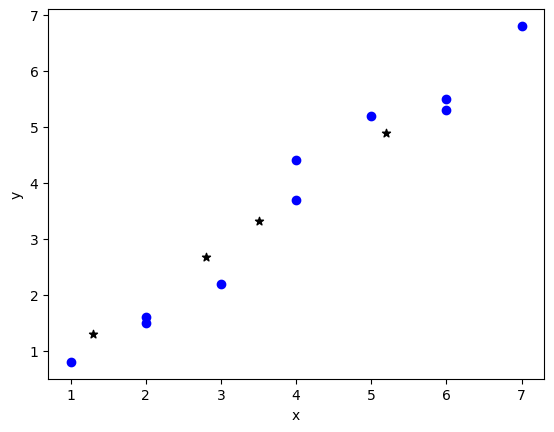

In [19]:
X_test = np.array([[1.3], [3.5], [5.2], [2.8]])

predictions = predict(X_test, weights)

import matplotlib.pyplot as plt
plt.scatter(X_train[:, 0], y_train, marker='o', c='b')
plt.scatter(X_test[:, 0], predictions, marker='*', c='k')
plt.xlabel('x')
plt.ylabel('y')
plt.show()



### Trying the model on anoter dataset (the diabetes dataset from skikit-learn)

In [20]:
from sklearn import datasets
diabetes = datasets.load_diabetes() 
print(diabetes.data.shape)

(442, 10)


In [21]:
num_test = 30 
X_train = diabetes.data[:-num_test, :]
y_train = diabetes.target[:-num_test]

### Train a  Linear Regression model with 5000 iterations, learning rate of 1, based on intercept-incl weights
#### (loss displayed every 500 iterations)

In [22]:
weights = train_linear_regression(X_train, y_train, max_iter=5000, learning_rate=1, fit_intercept=True)

2960.123025607216
1539.554802043756
1487.0293572901583
1480.280921685538
1479.0201696937393
1478.57947029736
1478.3009164521106
1478.0673513977845
1477.8521034731898
1477.647589314213


In [23]:
X_test = diabetes.data[-num_test:, :]
y_test = diabetes.target[-num_test:]
predictions = predict(X_test, weights)
print(predictions)

[232.22192119 123.87532386 166.12297497 170.23855082 228.12523411
 154.9570854  101.09011561  87.33479691 143.68827095 190.29424697
 198.00696804 149.63068784 169.56215468 109.01832867 161.97943375
 133.00757288 260.18431805 101.52516612 115.76691141 120.73229914
 219.62761982  62.21080727 136.29855757 122.27895603  55.14532638
 191.50289376 105.68864904 126.26137526 208.99754096  47.66481183]


In [24]:
print(y_test)

[261. 113. 131. 174. 257.  55.  84.  42. 146. 212. 233.  91. 111. 152.
 120.  67. 310.  94. 183.  66. 173.  72.  49.  64.  48. 178. 104. 132.
 220.  57.]


## Implementing Linear Regression with scikit-learn

### Using the SGD-based regression algo, SGDRegressor from the scikit-learn library:
#### The 'squared_error' for the loss parameter indicates the cost function is MSE, the penalty is the 
#### regularization term , which can be set to None, l1, or l2 (similar to the SGDClassifier).

### To reduce overfitting, max_iter is used , the learning rate is 0.2 and is unchanged during the 100 iterations.

In [25]:
from sklearn.linear_model import SGDRegressor
regressor = SGDRegressor(loss='squared_error', 
                         penalty='l2', 
                         alpha=0.0001, 
                         learning_rate='constant', 
                         eta0=0.2,
                         max_iter=100, 
                         random_state=42)

In [26]:
regressor.fit(X_train, y_train) 
predictions = regressor.predict(X_test)
print(predictions)

[213.10213626 108.68382244 152.18820636 153.81308148 208.42650616
 137.24771808  88.91487772  73.83269079 131.35148348 173.65164632
 178.16029669 135.26642772 152.92346973  89.39394334 149.98088897
 117.62875063 241.90665387  86.59992328 101.90393228 105.13958969
 202.13586812  50.60429115 121.43542595 106.34058448  41.11664041
 172.53683431  95.43229463 112.59395222 187.40792     36.1586737 ]


# Implementing Linear Regression with TensorFlow

#### Importing tf and constructing model:
#### specifiy the loss function, the MSE, and a gradient descent optimizer(Adam), with a learning rate of 1

In [27]:
import tensorflow as tf 
layer0 =tf.keras.layers.Dense(units=1, input_shape=[X_train.shape[1]])
model = tf.keras.Sequential(layer0)

In [28]:
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(1))

In [29]:
model.fit(X_train, y_train, epochs=100, verbose=True)

Epoch 1/100
13/13 [==============================] - 0s 446us/step - loss: 27691.9590
Epoch 2/100
13/13 [==============================] - 0s 830us/step - loss: 23842.1172
Epoch 3/100
13/13 [==============================] - 0s 671us/step - loss: 20452.6074
Epoch 4/100
13/13 [==============================] - 0s 503us/step - loss: 17517.3379
Epoch 5/100
13/13 [==============================] - 0s 308us/step - loss: 14926.0869
Epoch 6/100
13/13 [==============================] - 0s 1ms/step - loss: 12795.1396
Epoch 7/100
13/13 [==============================] - 0s 665us/step - loss: 10980.6436
Epoch 8/100
13/13 [==============================] - 0s 648us/step - loss: 9467.9697
Epoch 9/100
13/13 [==============================] - 0s 0s/step - loss: 8251.8760
Epoch 10/100
13/13 [==============================] - 0s 1ms/step - loss: 7227.3823
Epoch 11/100
13/13 [==============================] - 0s 540us/step - loss: 6442.4331
Epoch 12/100
13/13 [==============================] - 0s 0s/ste

In [30]:
predictions = model.predict(X_test)[:,0]
print(predictions)

1/1 [==============================] - 0s 39ms/step
[231.34125  123.88948  167.05746  171.45497  227.40147  151.5474
 102.868774  91.73986  151.04584  190.40414  190.40732  153.08562
 169.11385  105.89772  167.36842  133.39528  259.45197  101.29649
 119.3533   121.147514 219.1773    65.04659  138.10623  123.43684
  56.28573  189.26234  108.64344  129.20862  204.86339   48.3161  ]


## Estimating with Decision Tree Regression

In [31]:
def mse(targets):
    # when the set is empty
    if targets.size == 0:
        return 0
    return np.var(targets)

In [32]:
def weighted_mse(groups):
    total = sum(len(group) for group in groups)
    weighted_sum = 0.0
    for group in groups:
        weighted_sum += len(group) / float(total) * mse(group)
    return weighted_sum

In [33]:
print(f'{mse(np.array([1, 2, 3])):.4f}')

0.6667


In [34]:
print(f'{weighted_mse([np.array([1, 2, 3]), np.array([1, 2])]):.4f}')

0.5000


### assigning both branches as leaf nodes with the value as the avg of the targets of the samples included.

In [35]:
print(f'type-semi: {weighted_mse([np.array([600, 400, 700]), np.array([700, 800])]):.4f}')
print(f'bedroom-2: {weighted_mse([np.array([700, 400]), np.array([600, 800, 700])]):.4f}')
print(f'bedroom-3: {weighted_mse([np.array([600, 800]), np.array([700, 400, 700])]):.4f}')
print(f'bedroom-4: {weighted_mse([np.array([700]), np.array([600, 700, 800, 400])]):.4f}')

print(f'bedroom-2: {weighted_mse([np.array([]), np.array([600, 400, 700])]):.4f}')
print(f'bedroom-3: {weighted_mse([np.array([400]), np.array([600, 700])]):.4f}')
print(f'bedroom-4: {weighted_mse([np.array([400, 600]), np.array([700])]):.4f}')


type-semi: 10333.3333
bedroom-2: 13000.0000
bedroom-3: 16000.0000
bedroom-4: 17500.0000
bedroom-2: 15555.5556
bedroom-3: 1666.6667
bedroom-4: 6666.6667


# Implementing Decision Tree Regression 

In [36]:
def split_node(X, y, index, value):
    x_index = X[:, index]
    # if this feature is numerical
    if type(X[0, index]) in [int, float]:
        mask = x_index >= value
    # if this feature is categorical
    else:
        mask = x_index == value
    # split into left and right child
    left = [X[~mask, :], y[~mask]]
    right = [X[mask, :], y[mask]]
    return left, right
        

### Define the greedy search function - try all possible splits and return those with the least weighted MSE:

In [37]:
def get_best_split(X, y):
    """
    Obtain the best splitting point and resulting children for the data set X, y 

    @return: {index: index of the feature, value: feature value, children:
    left and right  children} 
    """ 
    best_index, best_value, best_score, children = None, None, 1e10, None                               

    for index in range(len(X[0])):
        for value in np.sort(np.unique(X[:, index])):
            groups = split_node(X, y, index, value)
            impurity = weighted_mse(
                    [groups[0][1], groups[1][1]])
            if impurity < best_score:
                best_index, best_value, best_score, children = index, value, impurity, groups
    return {'index': best_index, 'value': best_value, 'children': children}

In [38]:
def get_leaf(targets):
    # obtain the leaf as the meean of the targets 
    return np.mean(targets)

### The recursvie function, split. Check if any stopping criteria are met and if so assigns the leaf node, otherwise proceeds w further separation:

In [39]:
  """
    split children of a node to construc new nodes or asign them terminals

    @param node: dict, with children info 
    @param max_depth: maximal depth of the tree
    @param min_size: minimal samples required to further split a child 
    @param depth: current depth of the node 
    """ 

def split(node, max_depth, min_size, depth):
    left, right = node['children']
    del (node['children'])
    if left[1].size == 0:
        node['right'] = get_leaf(right[1])
        return
    if right[1].size == 0:
        node['left'] = get_leaf(left[1])
        return
    # Check if the current depth exceeds the maximal depth
    if depth >= max_depth:
        node['left'], node['right'] = get_leaf(left[1]), get_leaf(right[1])
        return
    # Check if the left child has enough samples
    if left[1].size <= min_size:
        node['left'] = get_leaf(left[1])
    else:
        # It has enough samples, we further split it
        result = get_best_split(left[0], left[1])
        result_left, result_right = result['children']
        if result_left[1].size == 0:
            node['left'] = get_leaf(result_right[1])
        elif result_right[1].size == 0:
            node['left'] = get_leaf(result_left[1])
        else:
            node['left'] = result
            split(node['left'], max_depth, min_size, depth + 1)
    # Check if the right child has enough samples
    if right[1].size <= min_size:
        node['right'] = get_leaf(right[1])
    else:
        # It has enough samples, we further split it
        result = get_best_split(right[0], right[1])
        result_left, result_right = result['children']
        if result_left[1].size == 0:
            node['right'] = get_leaf(result_right[1])
        elif result_right[1].size == 0:
            node['right'] = get_leaf(result_left[1])
        else:
            node['right'] = result
            split(node['right'], max_depth, min_size, depth + 1)
            



### Entry point of the regression tree:

In [40]:
def train_tree(X_train, y_train, max_depth, min_size):
    root = get_best_split(X_train, y_train)
    split(root, max_depth, min_size, 1)
    return root

### Testing with a hand-calculated example:

In [41]:
X_train = np.array([['semi', 3],
                    ['detached', 2],
                    ['detached', 3],
                    ['semi', 2],
                    ['semi', 4]], dtype=object)
y_train = np.array([600, 700, 800, 400, 700])
tree = train_tree(X_train, y_train, 2, 2)

In [42]:
CONDITION = {'numerical': {'yes': '>=', 'no': '<'},
             'categorical': {'yes': 'is', 'no': 'is not'}}
def visualize_tree(node, depth=0):
    if isinstance(node, dict):
        if type(node['value']) in [int, float]:
            condition = CONDITION['numerical']
        else:
            condition = CONDITION['categorical']
        print('{}|- X{} {} {}'.format(depth * '  ', node['index'] + 1, condition['no'], node['value']))
        if 'left' in node:
            visualize_tree(node['left'], depth + 1)
        print('{}|- X{} {} {}'.format(depth * '  ', node['index'] + 1, condition['yes'], node['value']))
        if 'right' in node:
            visualize_tree(node['right'], depth + 1)
    else:
        print('{}[{}]'.format(depth * '  ', node))

visualize_tree(tree)



|- X1 is not detached
  |- X2 < 3
    [400.0]
  |- X2 >= 3
    [650.0]
|- X1 is detached
  [750.0]


## Applying the DecistionTreeRegressor library from scikit-learn to predict housing prices: 

In [43]:
housing = datasets.fetch_california_housing()

In [44]:
num_test = 10 # The last 10 samples as the testing set
X_train = housing.data[:-num_test, :]
y_train = housing.data[:-num_test]
X_test = housing.data[-num_test:, :]
y_test = housing.data[-num_test:]


In [45]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=10, min_samples_split=3,random_state=42)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_split=3, random_state=42)

In [46]:
predictions = regressor.predict(X_test) 
print(predictions)

[[ 3.96486216e+00  1.50000000e+01  5.58817920e+00  1.06176298e+00
   1.26354054e+03  3.18137398e+00  3.57994595e+01 -1.19436757e+02]
 [ 3.91608200e+00  1.83800000e+01  5.59918859e+00  1.09260376e+00
   1.20230000e+03  2.86903113e+00  3.56706000e+01 -1.19361200e+02]
 [ 4.36274615e+00  1.20000000e+01  5.96754242e+00  1.12162918e+00
   1.05038462e+03  2.85100972e+00  3.55161538e+01 -1.19297436e+02]
 [ 4.41150851e+00  2.51914894e+01  5.74054029e+00  1.09469015e+00
   1.08221277e+03  2.78686029e+00  3.49487234e+01 -1.18802553e+02]
 [ 3.84669167e+00  2.31111111e+01  5.52979621e+00  1.06195130e+00
   1.03366667e+03  2.91769781e+00  3.59269444e+01 -1.19669444e+02]
 [ 3.69572623e+00  2.35409836e+01  5.69842100e+00  1.12491583e+00
   8.48639344e+02  2.60445686e+00  3.62760656e+01 -1.20139508e+02]
 [ 4.06832400e+00  1.72800000e+01  6.48426254e+00  1.34814971e+00
   3.56360000e+02  2.67227201e+00  3.64592000e+01 -1.19907600e+02]
 [ 4.13843830e+00  1.33829787e+01  6.40983862e+00  1.18004751e+00
   

## Comparing the predictions

In [47]:
print(y_test)

[[ 3.56730000e+00  1.10000000e+01  5.93258427e+00  1.13483146e+00
   1.25700000e+03  2.82471910e+00  3.92900000e+01 -1.21320000e+02]
 [ 3.51790000e+00  1.50000000e+01  6.14583333e+00  1.14120370e+00
   1.20000000e+03  2.77777778e+00  3.93300000e+01 -1.21400000e+02]
 [ 3.12500000e+00  1.50000000e+01  6.02337662e+00  1.08051948e+00
   1.04700000e+03  2.71948052e+00  3.92600000e+01 -1.21450000e+02]
 [ 2.54950000e+00  2.70000000e+01  5.44502618e+00  1.07853403e+00
   1.08200000e+03  2.83246073e+00  3.91900000e+01 -1.21530000e+02]
 [ 3.71250000e+00  2.80000000e+01  6.77906977e+00  1.14825581e+00
   1.04100000e+03  3.02616279e+00  3.92700000e+01 -1.21560000e+02]
 [ 1.56030000e+00  2.50000000e+01  5.04545455e+00  1.13333333e+00
   8.45000000e+02  2.56060606e+00  3.94800000e+01 -1.21090000e+02]
 [ 2.55680000e+00  1.80000000e+01  6.11403509e+00  1.31578947e+00
   3.56000000e+02  3.12280702e+00  3.94900000e+01 -1.21210000e+02]
 [ 1.70000000e+00  1.70000000e+01  5.20554273e+00  1.12009238e+00
   

# Implementing a Regression Forest

In [48]:
from sklearn.ensemble import RandomForestRegressor
regressor  = RandomForestRegressor(n_estimators=100, max_depth=10,min_samples_split=3,random_state=42)
regressor.fit(X_train, y_train) 
predictions = regressor.predict(X_test) 
print(predictions)

[[ 4.09131463e+00  1.43079497e+01  5.54543258e+00  1.07074350e+00
   1.25736270e+03  3.11462145e+00  3.53898919e+01 -1.19156453e+02]
 [ 4.10436936e+00  1.51696482e+01  5.61532247e+00  1.09024318e+00
   1.20001336e+03  2.81132830e+00  3.58814242e+01 -1.19520090e+02]
 [ 4.26209647e+00  1.28566079e+01  5.86139718e+00  1.10811450e+00
   1.04657478e+03  2.83110331e+00  3.56131263e+01 -1.19356674e+02]
 [ 4.26803611e+00  2.60810773e+01  5.63730308e+00  1.08999668e+00
   1.08218361e+03  2.83990997e+00  3.49617758e+01 -1.18905027e+02]
 [ 3.73905667e+00  2.38264945e+01  5.40641183e+00  1.06450066e+00
   1.04140156e+03  2.87604289e+00  3.59695597e+01 -1.19757580e+02]
 [ 3.81317289e+00  2.49533564e+01  5.83145017e+00  1.12819617e+00
   8.45034840e+02  2.61467588e+00  3.65013861e+01 -1.20226253e+02]
 [ 4.04360521e+00  1.77977009e+01  6.99635281e+00  1.43350208e+00
   3.55503011e+02  2.57927508e+00  3.64742178e+01 -1.19837826e+02]
 [ 4.28809621e+00  1.39765233e+01  6.07172325e+00  1.13497480e+00
   

# Evaluating Regression Performance

In [49]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
num_test = 30 # using the last 30 samples as as test set 
X_train = diabetes.data[:-num_test, :]
y_train = diabetes.target[:-num_test]
X_test = diabetes.data[-num_test:, :]
y_test = diabetes.target[-num_test:]
param_grid = {
    "alpha": [1e-07, 1e-06, 1e-05],
    "penalty": [None, "l2"],
    "eta0": [0.03, 0.05, 0.1],
    "max_iter": [500, 1000]
}

from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
regressor = SGDRegressor(loss='squared_error',
                         learning_rate='constant',
                         random_state=42)
grid_search = GridSearchCV(regressor, param_grid, cv=3)

In [50]:
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

regressor_best = grid_search.best_estimator_

{'alpha': 1e-07, 'eta0': 0.05, 'max_iter': 500, 'penalty': None}


In [51]:
predictions = regressor_best.predict(X_test)

In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print(mean_squared_error(y_test, predictions))

1933.3755675117393


In [53]:
print(mean_absolute_error(y_test, predictions))

35.483021678336264


In [54]:
print(r2_score(y_test, predictions))

0.6247482987860085


In [55]:
##### start here:

# Predicting Stock Prices with the 3 Regression Algorithms

#### training set data from 1990 to 2022, testing the set with data from first half of 2023

In [56]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [57]:
# Reusing the feature generation function we developed
def generate_features(df):
    """
    Generate features for a stock/index based on historical price and performance
    @param df: dataframe with columns "Open", "Close", "High", "Low", "Volume", "Adj Close"
    @return: dataframe, data set with new features
    """
    df_new = pd.DataFrame()
    # 6 original features
    df_new['open'] = df['Open']
    df_new['open_1'] = df['Open'].shift(1)
    df_new['close_1'] = df['Close'].shift(1)
    df_new['high_1'] = df['High'].shift(1)
    df_new['low_1'] = df['Low'].shift(1)
    df_new['volume_1'] = df['Volume'].shift(1)
    # 31 generated features
    # average price
    df_new['avg_price_5'] = df['Close'].rolling(5).mean().shift(1)
    df_new['avg_price_30'] = df['Close'].rolling(21).mean().shift(1)
    df_new['avg_price_365'] = df['Close'].rolling(252).mean().shift(1)
    df_new['ratio_avg_price_5_30'] = df_new['avg_price_5'] / df_new['avg_price_30']
    df_new['ratio_avg_price_5_365'] = df_new['avg_price_5'] / df_new['avg_price_365']
    df_new['ratio_avg_price_30_365'] = df_new['avg_price_30'] / df_new['avg_price_365']
    # average volume
    df_new['avg_volume_5'] = df['Volume'].rolling(5).mean().shift(1)
    df_new['avg_volume_30'] = df['Volume'].rolling(21).mean().shift(1)
    df_new['avg_volume_365'] = df['Volume'].rolling(252).mean().shift(1)
    df_new['ratio_avg_volume_5_30'] = df_new['avg_volume_5'] / df_new['avg_volume_30']
    df_new['ratio_avg_volume_5_365'] = df_new['avg_volume_5'] / df_new['avg_volume_365']
    df_new['ratio_avg_volume_30_365'] = df_new['avg_volume_30'] / df_new['avg_volume_365']
    # standard deviation of prices
    df_new['std_price_5'] = df['Close'].rolling(5).std().shift(1)
    df_new['std_price_30'] = df['Close'].rolling(21).std().shift(1)
    df_new['std_price_365'] = df['Close'].rolling(252).std().shift(1)
    df_new['ratio_std_price_5_30'] = df_new['std_price_5'] / df_new['std_price_30']
    df_new['ratio_std_price_5_365'] = df_new['std_price_5'] / df_new['std_price_365']
    df_new['ratio_std_price_30_365'] = df_new['std_price_30'] / df_new['std_price_365']
    # standard deviation of volumes
    df_new['std_volume_5'] = df['Volume'].rolling(5).std().shift(1)
    df_new['std_volume_30'] = df['Volume'].rolling(21).std().shift(1)
    df_new['std_volume_365'] = df['Volume'].rolling(252).std().shift(1)
    df_new['ratio_std_volume_5_30'] = df_new['std_volume_5'] / df_new['std_volume_30']
    df_new['ratio_std_volume_5_365'] = df_new['std_volume_5'] / df_new['std_volume_365']
    df_new['ratio_std_volume_30_365'] = df_new['std_volume_30'] / df_new['std_volume_365']
    # # return
    df_new['return_1'] = ((df['Close'] - df['Close'].shift(1)) / df['Close'].shift(1)).shift(1)
    df_new['return_5'] = ((df['Close'] - df['Close'].shift(5)) / df['Close'].shift(5)).shift(1)
    df_new['return_30'] = ((df['Close'] - df['Close'].shift(21)) / df['Close'].shift(21)).shift(1)
    df_new['return_365'] = ((df['Close'] - df['Close'].shift(252)) / df['Close'].shift(252)).shift(1)
    df_new['moving_avg_5'] = df_new['return_1'].rolling(5).mean().shift(1)
    df_new['moving_avg_30'] = df_new['return_1'].rolling(21).mean().shift(1)
    df_new['moving_avg_365'] = df_new['return_1'].rolling(252).mean().shift(1)
    # the target
    df_new['close'] = df['Close']
    df_new = df_new.dropna(axis=0)
    return df_new

In [58]:
data_raw = pd.read_csv(r'C:\Users\S\_devrepos\PyML_by_Example\data_for_PyML_by_Ex\ch5_datasets\19900101_20230630.csv', index_col='Date')
data = generate_features(data_raw)
start_train = '1990-01-01'
end_train = '2022-12-31'

start_test = '2023-01-01'
end_test = '2023-06-30'

data_train = data.loc[start_train:end_train]
X_train = data_train.drop('close', axis=1).values
y_train = data_train['close'].values

print(X_train.shape)

(8061, 37)


In [59]:
print(y_train.shape)

(8061,)


In [60]:
data_test = data.loc[start_test:end_test]
X_test = data_test.drop('close', axis=1).values
y_test = data_test['close'].values
print(X_test.shape)

(124, 37)


In [61]:
# First experiment with linear regression

scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [62]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=3)

In [63]:
param_grid = {
    "alpha": [1e-4, 3e-4, 1e-3],
    "eta0": [0.01, 0.03, 0.1],
}


lr = SGDRegressor(penalty='l2', max_iter=5000, random_state=42)
grid_search = GridSearchCV(lr, param_grid, cv=tscv, scoring='r2')
grid_search.fit(X_scaled_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
             estimator=SGDRegressor(max_iter=5000, random_state=42),
             param_grid={'alpha': [0.0001, 0.0003, 0.001],
                         'eta0': [0.01, 0.03, 0.1]},
             scoring='r2')

In [64]:
print(grid_search.best_params_)
lr_best = grid_search.best_estimator_

predictions_lr = lr_best.predict(X_scaled_test)


{'alpha': 0.0001, 'eta0': 0.1}


In [65]:
param_grid = {
    'max_depth': [20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

dt = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(dt, param_grid, cv=tscv, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
             estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [20, 30, 50],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='r2')

In [66]:
print(grid_search.best_params_)
dt_best = grid_search.best_estimator_

predictions_dt = dt_best.predict(X_test)

print(f'R^2: {r2_score(y_test, predictions_dt):.3f}')



{'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}
R^2: 0.914


In [67]:
# Experiment with random forest
param_grid = {
    'max_depth': [20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

rf = RandomForestRegressor(n_estimators=30, n_jobs=-1, random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=tscv, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)



GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
             estimator=RandomForestRegressor(n_estimators=30, n_jobs=-1,
                                             random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [20, 30, 50],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='r2')

In [68]:
print(grid_search.best_params_)
rf_best = grid_search.best_estimator_

predictions_rf = rf_best.predict(X_test)



{'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [69]:
print(f'R^2: {r2_score(y_test, predictions_rf):.3f}')

R^2: 0.937


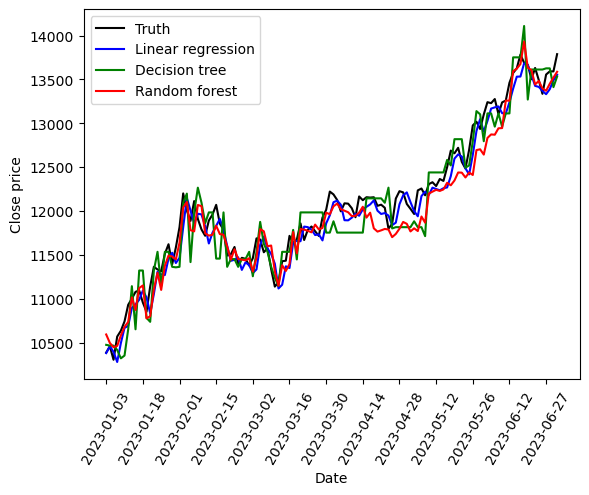

In [70]:
# import matplotlib.pyplot as plt
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.plot(data_test.index, y_test, c='k')
plt.plot(data_test.index, predictions_lr, c='b')
plt.plot(data_test.index, predictions_dt, c='g')
plt.plot(data_test.index, predictions_rf, c='r')
plt.xticks(range(0, 130, 10), rotation=60)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Close price', fontsize=10)
plt.legend(['Truth', 'Linear regression', 'Decision tree', 'Random forest'], fontsize=10)
plt.show()

